In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN Fashion Style Classification Modeling



## Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications import vgg16

from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

## Import Data

In [ ]:
# data = '/content/drive/MyDrive/fashionData'
tr = '/content/drive/MyDrive/style.zip (Unzipped Files)/train'
val = '/content/drive/MyDrive/style.zip (Unzipped Files)/test'

# 클래스 리스트 선언
class_list = ["street","americancasual","casual", "formal", "girlish", "romantic"]

tr = tf.keras.preprocessing.image_dataset_from_directory(
    tr,
    labels="inferred",
    label_mode="categorical",
    class_names=class_list,
    seed=6,
)

val = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    labels="inferred",
    label_mode="categorical",
    class_names=class_list,
    seed=6,
)

tr, val

Found 4442 files belonging to 6 classes.
Found 958 files belonging to 6 classes.


(<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>)

## Model1: 간단한 CNN Model

In [ ]:
# 간단한 CNN 신경망 구축
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(6, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 5
history = model1.fit(tr, validation_data=val, epochs=epochs)

model1.evaluate(val)

Epoch 1/5
175/175 [==============================] - 78s 367ms/step - loss: 22.8186 - accuracy: 0.1872 - val_loss: 1.7872 - val_accuracy: 0.1911
Epoch 2/5
175/175 [==============================] - 56s 305ms/step - loss: 1.7235 - accuracy: 0.2484 - val_loss: 1.7907 - val_accuracy: 0.2270
Epoch 3/5
175/175 [==============================] - 54s 302ms/step - loss: 1.4269 - accuracy: 0.4257 - val_loss: 1.9686 - val_accuracy: 0.2845
Epoch 4/5
175/175 [==============================] - 53s 290ms/step - loss: 0.9570 - accuracy: 0.6387 - val_loss: 2.4727 - val_accuracy: 0.3168
Epoch 5/5
44/44 [==============================] - 9s 160ms/step - loss: 2.8892 - accuracy: 0.3103


[2.88917875289917, 0.3103448152542114]

In [ ]:
import matplotlib.pyplot as plt

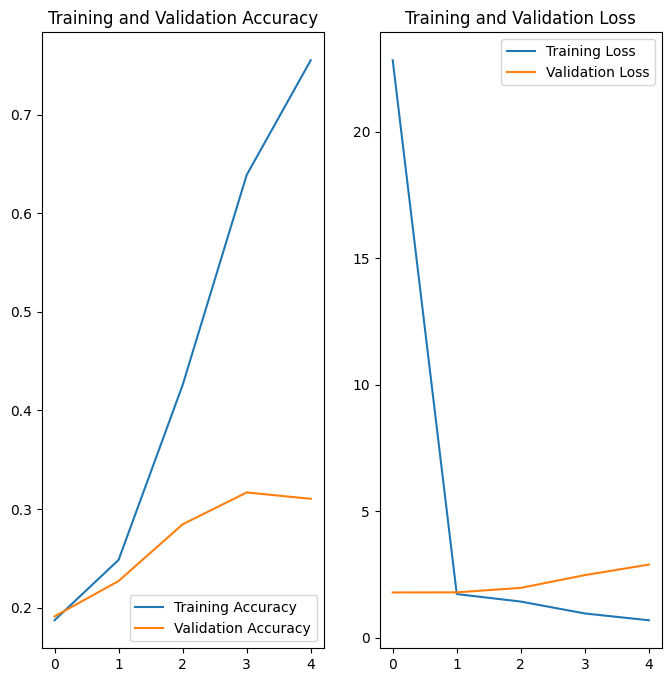

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

모델 저장

In [ ]:
from keras.models import load_model
model1.save('model_fashion.h5')

## Model2: 개선된 CNN Model (ResNet Transfer Learning)

In [ ]:
# Fully Connected layer 부분을 제거하는 역할
resnet = ResNet50(weights='imagenet', include_top=False)

# ResNet50 레이어의 파라미터를 학습하지 않도록 설정
for layer in resnet.layers:
    layer.trainable = False

# Global average pooling layer 추가
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)

predictions = Dense(6, activation='sigmoid')(x)
model3 = Model(resnet.input, predictions)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs=8
history3 = model3.fit(tr, validation_data=val, epochs=epochs)

Epoch 1/8
30/30 [==============================] - 692s 20s/step - loss: 0.0751 - accuracy: 0.9698 - val_loss: 26.3232 - val_accuracy: 0.2136
Epoch 2/8
30/30 [==============================] - 17s 510ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.6252 - val_accuracy: 0.2136
Epoch 3/8
30/30 [==============================] - 17s 513ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.6984 - val_accuracy: 0.2136
Epoch 4/8
30/30 [==============================] - 16s 491ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.7021 - val_accuracy: 0.2136
Epoch 5/8
30/30 [==============================] - 17s 514ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.7022 - val_accuracy: 0.2136
Epoch 6/8
30/30 [==============================] - 18s 507ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.7022 - val_accuracy: 0.2136
Epoch 7/8
30/30 [==============================] - 17s 514ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 27.7022

In [ ]:
from keras.models import load_model
model3.save('model_fashion_improved_64_8.h5')

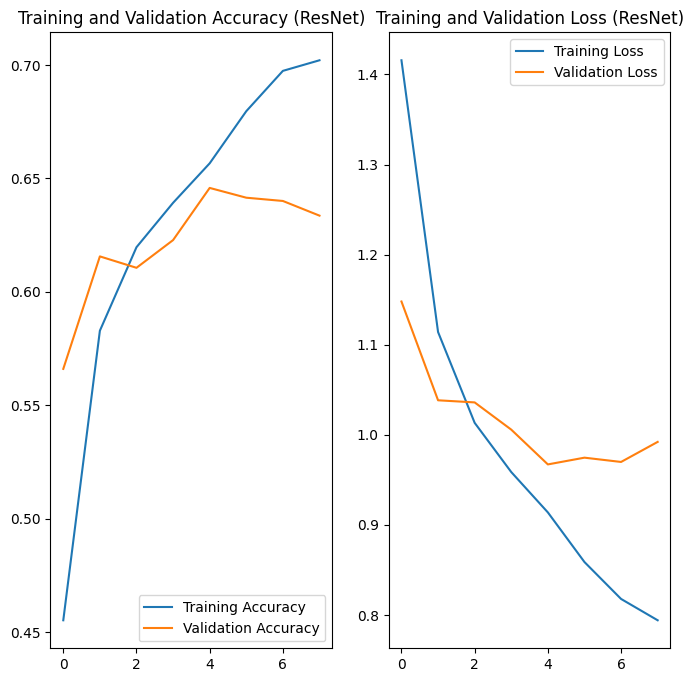

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (ResNet)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (ResNet)')
plt.show()

model 저장